In [1]:
%matplotlib inline

In [2]:
%run notebook_setup.py

In [430]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import starry
from scipy.special import legendre as P
from scipy.optimize import minimize

starry.config.quiet = True

In [534]:
def hwhm(r, c=7.6):
    return np.arccos((2 + 3 * c * r * (2 + c * r)) / (2 * (1 + c * r) ** 3)) * 180 / np.pi

In [425]:
def peak_error(ydeg, cr):
    delta = 1.0
    I = (1 - 0.5 * delta * cr / (1 + cr))
    for l in range(1, ydeg + 1):
        I -= 0.5 * delta * cr * (2 + cr) / (1 + cr) ** (l + 1)
    return np.abs(I)

In [595]:
def min_radius(ydeg, tol=1e-2, c=7.6):
    f = lambda cr: (peak_error(ydeg, cr) - tol) ** 2
    res = minimize(f, 0.25)
    return res.x / c

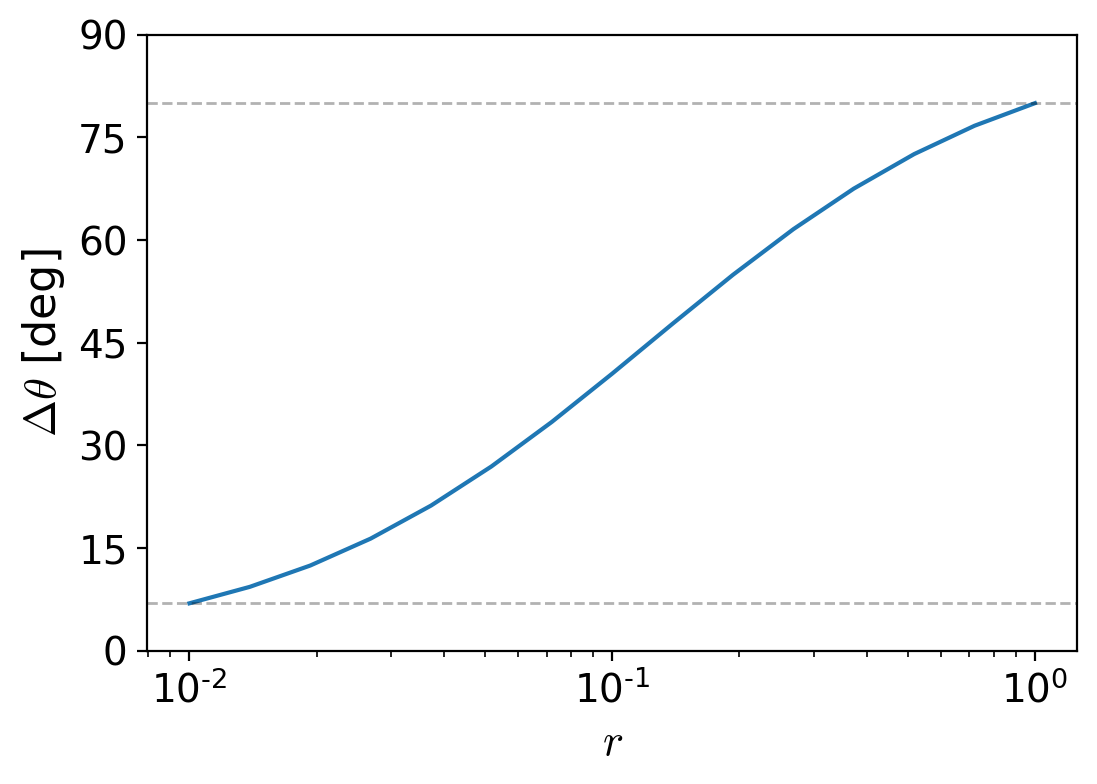

In [554]:
r = np.logspace(-2, 0, 15)
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.plot(r, hwhm(r))
ax.set_yticks([0, 15, 30, 45, 60, 75, 90]);
ax.set_xlabel(r"$r$", fontsize=16)
ax.set_ylabel(r"$\Delta\theta$ [deg]", fontsize=16);
ax.set_xscale("log")
ax.axhline(7, color="k", lw=1, ls="--", alpha=0.3)
ax.axhline(80, color="k", lw=1, ls="--", alpha=0.3);

In [607]:
ydeg = 20
map = starry.Map(ydeg, lazy=False)

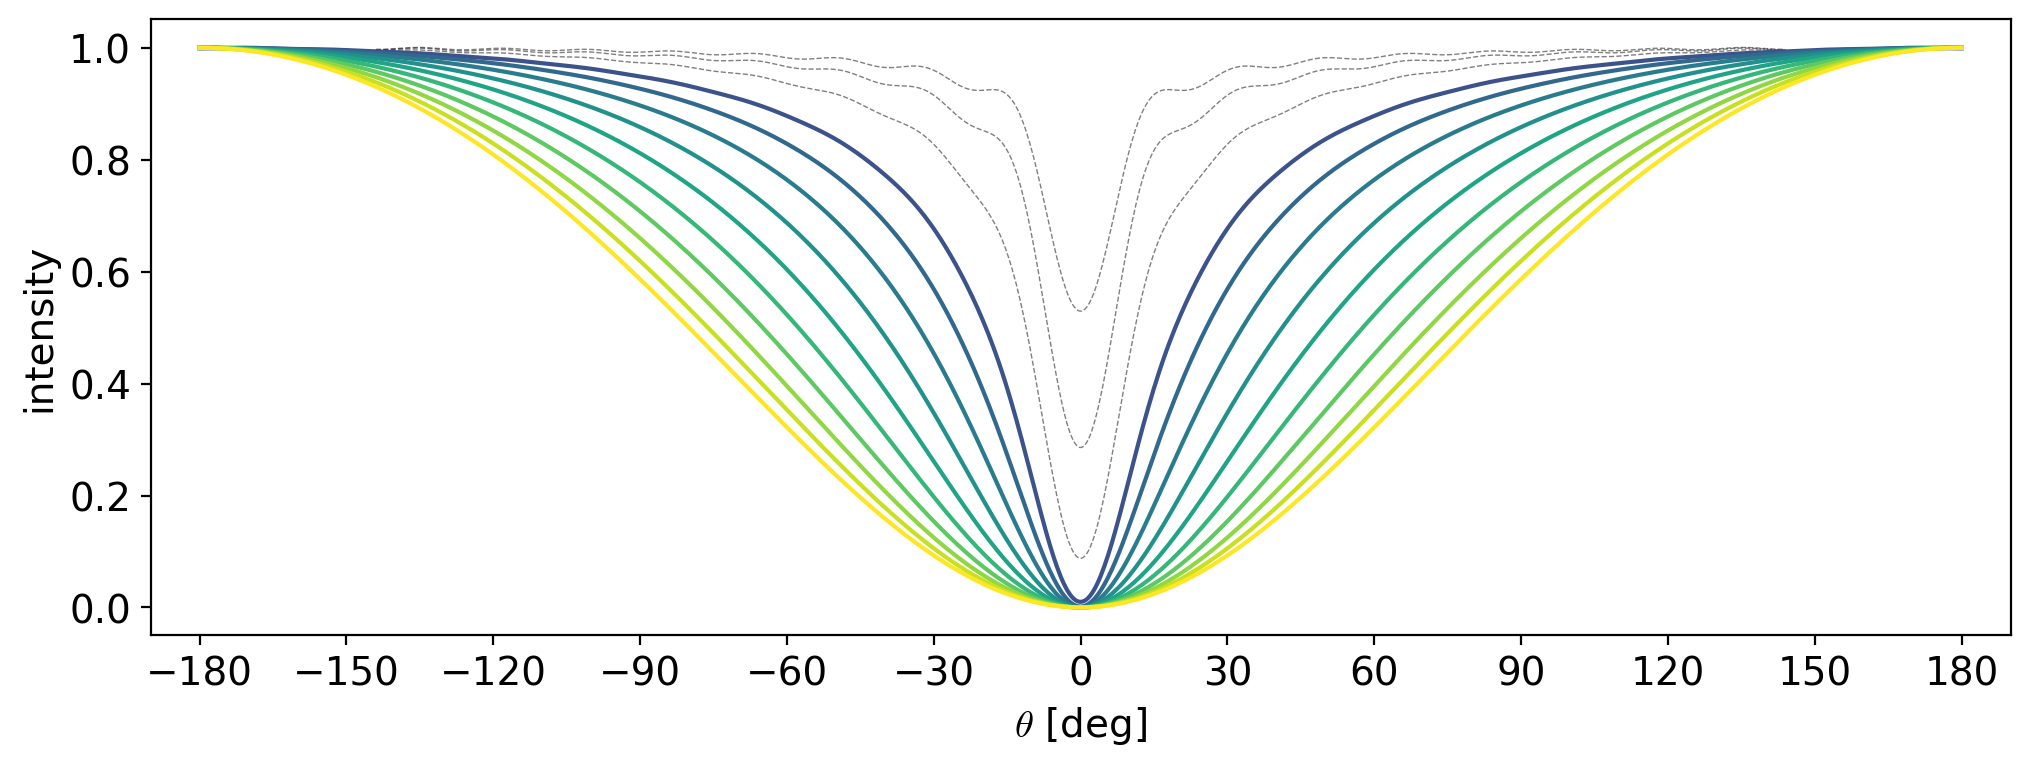

In [645]:
c = 7.6
minr = min_radius(ydeg, tol=0.01)
r = np.append([minr / 2, minr / 4, minr / 8], np.logspace(np.log10(minr), 0, 10))
delta = 1
lon = np.linspace(-180, 180, 1000)
l = np.arange(1, map.ydeg + 1)

fig, ax = plt.subplots(1, figsize=(12, 4))
cmap = plt.get_cmap("viridis")
for k in range(len(r)):
    x = np.zeros(map.Ny)
    x[0] = 1 - 0.5 * delta * c * r[k] * (1 + c * r[k]) ** -1
    x[l * (l + 1)] = -delta / np.sqrt(2 * l + 1) * (
        (1 + c * r[k]) ** -(l + 1) * c * r[k]
        +
        0.5 * (1 + c * r[k]) ** -(l + 1) * c ** 2 * r[k] ** 2
    )
    map[:, :] = x
    if k < 3:
        ax.plot(lon[100:-100], np.pi * map.intensity(lon=lon[100:-100]), "k--", lw=0.5, alpha=0.5)
    else:
        ax.plot(lon, np.pi * map.intensity(lon=lon), color=cmap(k / (len(r) - 1)));

ax.set_xlim(-190, 190)
ax.set_xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180]);
ax.set_xlabel(r"$\theta$ [deg]");
ax.set_ylabel(r"intensity");

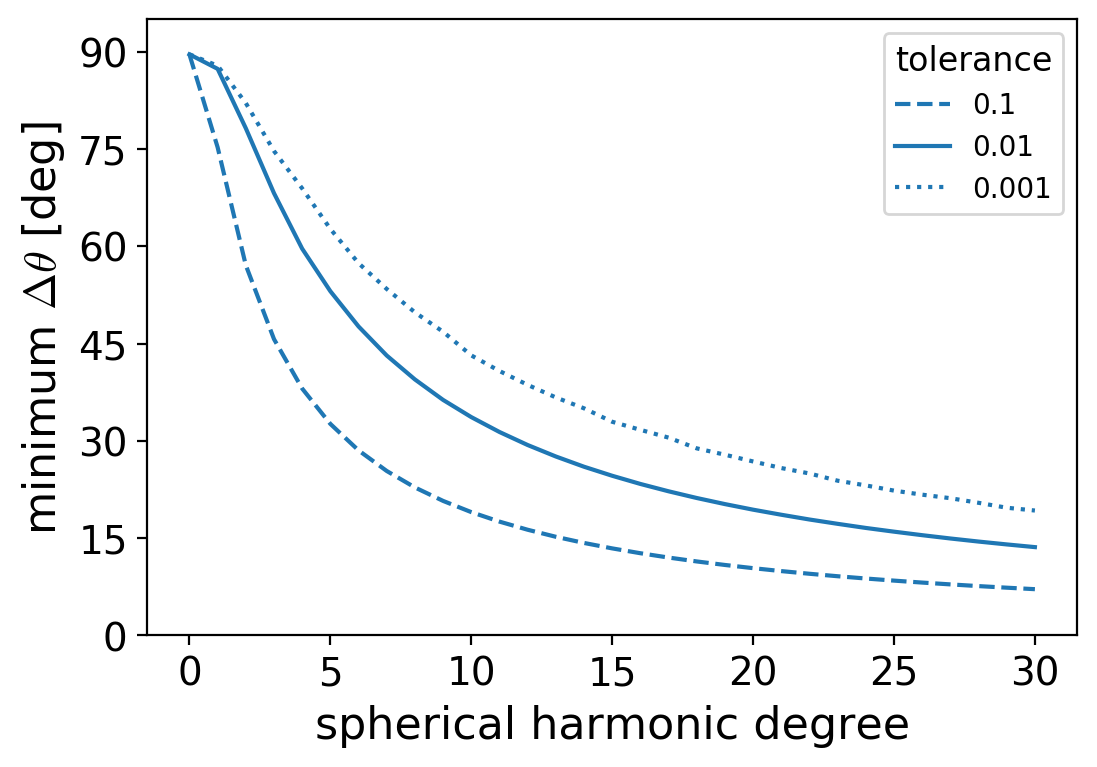

In [596]:
fig, ax = plt.subplots(1, figsize=(6, 4))

l = np.arange(0, 31, dtype=int)
for tol, style in zip([1e-1, 1e-2, 1e-3], ["C0--", "C0-", "C0:"]):
    r = hwhm(np.array([min_radius(ydeg, tol=tol) for ydeg in l]))
    plt.plot(l, r, style, label=tol)
legend = ax.legend(loc="upper right", fontsize=10, title=r"tolerance")
plt.setp(legend.get_title(), fontsize=12)
ax.set_ylim(0, 95)
ax.set_yticks([0, 15, 30, 45, 60, 75, 90]);
ax.set_xlabel("spherical harmonic degree", fontsize=16)
ax.set_ylabel(r"minimum $\Delta\theta$ [deg]", fontsize=16);